<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp



N = 30

L0 = 2                                                 # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                      # physical domain              

rcol = 1/np.sqrt(L0**2+r**2)-r**2/(L0**2+r**2)**(3/2)          # dcol/dr

rrcol = -3*r/(L0**2+r**2)**(3/2)+3*r**3/(L0**2+r**2)**(5/2)     # d^2 col/dr^2


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+1,N+1])
rSB = np.zeros([N+1,N+1])
rrSB = np.zeros([N+1,N+1])
colSB = np.zeros([N+1,N+1])
ccolSB = np.zeros([N+1,N+1])


Phi = np.zeros([N+1,N+1])
rPhi = np.zeros([N+1,N+1])
rrPhi = np.zeros([N+1,N+1])

Pi = np.zeros([N+1,N+1])
rPi = np.zeros([N+1,N+1])
rrPi = np.zeros([N+1,N+1])

Krr = np.zeros([N+1,N+1])
rKrr = np.zeros([N+1,N+1])
rrKrr = np.zeros([N+1,N+1])

Chi = np.zeros([N+1,N+1])
rChi = np.zeros([N+1,N+1])
rrChi = np.zeros([N+1,N+1])

Alpha = np.zeros([N,N])
rAlpha = np.zeros([N,N])
rrAlpha = np.zeros([N,N])

Beta = np.zeros([N,N])
rBeta = np.zeros([N,N])
rrBeta = np.zeros([N,N])
rBeta_r = np.zeros([N,N])

#SB[0,] = 1
#SB[1,] = colr

for i in range(N+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

#colSB[0,] = 0
#colSB[1,] = 1
#rSB[0,] = rcol*colSB[0,]
#rSB[1,] = rcol*colSB[1,]

#for i in range(1, N+1):
#  colSB[i,] = 2*colr*colSB[i-1,] + 2*SB[i-1,] - colSB[i-2,]
#  rSB[i,] = rcol*colSB[i,]                                                    # colSB[i,] = dSB[i,]/dcol, rcol = dcol/dr

for i in range(N+1):
#  colSB[i,] = 2*colr*colSB[i-1,] + 2*SB[i-1,] - colSB[i-2,]
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

#ccolSB[0,] = 0
#ccolSB[1,] = 0
#rrSB[0,] = rrcol*colSB[0,] + (rcol)**2 * ccolSB[0,]
#rrSB[1,] = rrcol*colSB[1,] + (rcol)**2 * ccolSB[1,]

for i in range(N+1):
#  ccolSB[i,] = 2*colSB[i-1,] + 2*colr*ccolSB[i-1,] + 2*colSB[i-1,] - ccolSB[i-2,]
  rrSB[i,] = np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                       # ccolSB[i,] = d²SB[i,]/dcol²


# Derivada Matriz Base:

#colT[0,] = 0
#colT[1,] = 1

#xT[0,] = xcol*colT[0,]
#xT[1,] = xcol*colT[1,]

#for i in range(2, N+2):
 # colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  #xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx

#psi = T[0:N,:]   
#xpsi = xT[0:N,:]


# Initial conditions of Phi                                       # PhI initial

r0 = 0.5

A0 = 0.0001

sigma = 1

Phi_0 = A0*r**2*np.exp(-(r-r0)**2/sigma**2)            # Phi initial



inv_SB = np.linalg.inv(SB)
  
a0 = np.dot(Phi_0, inv_SB)  # coeficients a(0)



Phi = np.dot(a0, SB)      # approximative solution in t=0

rPhi= np.dot(a0, rSB)

rrPhi = np.dot(a0, rrSB)


In [40]:
# Plot: Initial Conditions

M = 3000

rplot = np.linspace(0,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

Phi_plot0 = 0.0001*rplot**2*np.exp(-(rplot-0.5)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, SBplot)

erro = (Phiplot - Phi_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


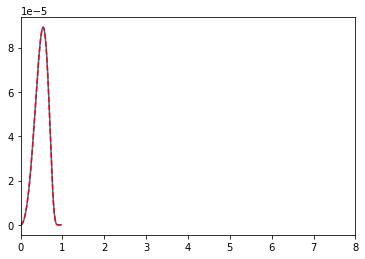

In [73]:
plt.plot(colplot, Phiplot, colplot, Phi_plot0, "--r")
plt.xlim(0,8)
plt.show()

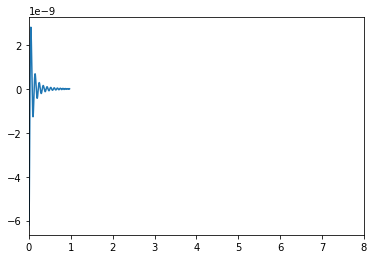

In [74]:
plt.plot(colplot, erro)
plt.xlim(0,8)
plt.show()

In [42]:
# Initial values of PI:

Pi_0 = np.zeros([N+1])

b0 = np.dot(Pi_0, inv_SB)

Pi = np.dot(b0, SB) 

rPi= np.dot(b0, rSB)

rrPi = np.dot(b0, rrSB)

In [79]:
# Initial values of Krr:

Krr_0 = 0

SB1 = np.zeros([N+1,N+1])
rSB1 = np.zeros([N+1,N+1])
rrSB1 = np.zeros([N+1,N+1])
colSB1 = np.zeros([N+1,N+1])
ccolSB1 = np.zeros([N+1,N+1])

SB[0,] = 1
SB[1,] = colr

for i in range(1,N+1):
  SB1[i,] = 2*colr*SB[i-1,] - SB[i-2,]

# Derivada MaSBriz Base:

colSB[0,] = 0
colSB[1,] = 1
rSB[0,] = rcol*colSB[0,]
rSB[1,] = rcol*colSB[1,]

for i in range(2, N+2):
  colSB1[i,] = 2*colr*colSB[i-1,] + 2*SB[i-1,] - colSB[i-2,]
  rSB1[i,] = rcol*colSB1[i,]                                                    # colSB[i,] = dSB[i,]/dcol, rcol = dcol/dr


ccolSB[0,] = 0
ccolSB[1,] = 0
rrSB[0,] = rrcol*colSB[0,] + (rcol)**2 * ccolSB[0,]
rrSB[1,] = rrcol*colSB[1,] + (rcol)**2 * ccolSB[1,]

for i in range(2, N+2):
  ccolSB1[i,] = 2*colSB[i-1,] + 2*colr*ccolSB[i-1,] + 2*colSB[i-1,] - ccolSB[i-2,]
  rrSB1[i,] = rrcol*colSB[i,] + (rcol)**2 * ccolSB[i,]                         # ccolSB[i,] = d²SB[i,]/dcol²



psi = SB[0:N,:]   
rpsi = rSB[0:N,:]
rrpsi = rrSB[0:N,:]



psi =  SB1[0:N+1,:] 

inv_psi = np.linalg.inv(psi)

ck0 = np.dot(Krr_0, inv_SB)

Krr = np.dot(ck0, rSB) 

rKrr = np.dot(ck0, rSB)

rrKrr = np.dot(ck0, rrSB)

IndexError: ignored

In [67]:
psi

array([[ 9.89549992e-04, -7.85749012e-03,  2.61902908e-02,
        -6.10027433e-02,  1.16482034e-01, -1.95766367e-01,
         3.00767466e-01, -4.32044517e-01,  5.88735053e-01,
        -7.68545994e-01,  9.67805612e-01, -1.18157476e+00,
         1.40381329e+00, -1.62759536e+00,  1.84536533e+00,
        -2.04922425e+00,  2.23123581e+00, -2.38373956e+00,
         2.49965910e+00, -2.57279291e+00,  2.59807621e+00,
        -2.57180336e+00,  2.49180161e+00, -2.35754927e+00,
         2.17023307e+00, -1.93274222e+00,  1.64959896e+00,
        -1.32682790e+00,  9.71768774e-01, -5.92839707e-01,
         1.99259618e-01],
       [ 1.23924726e-04,  3.97281836e-01,  3.32935794e-03,
         7.84727083e-01,  1.52608168e-02,  1.15283041e+00,
         4.12526770e-02,  1.49273644e+00,  8.59359958e-02,
         1.79653388e+00,  1.52998598e-01,  2.05751386e+00,
         2.44984574e-01,  2.27038297e+00,  3.63141678e-01,
         2.43142288e+00,  5.07323199e-01,  2.53859088e+00,
         6.75948665e-01,  2.59

In [7]:
## Initial chi: solving the Hamiltonian constraint:

c0 = np.zeros([N+1])
for i in range(N+1):
  c0[i] = 0.001



N_int = 5




Chi = np.dot(c0, SB)

rChi = np.dot(c0, rSB)

rrChi = np.dot(c0, rrSB)

# We obtain the modes first and the values.

Chiplot = np.dot(c0, SBplot)


In [11]:
# Initial values of alpha:

Alpha_0 = 0

al0 = np.dot(Alpha_0, inv_SB)

Alpha = 1 + np.dot(al0, SB)

rAlpha = np.dot(al0, rSB)

rrAlpha = np.dot(al0, rrSB)

In [9]:
# Initial values of beta:

Beta_0 = 0

be0 = np.dot(Beta_0, inv_SB)

Beta = np.dot(be0, SB)

rBeta = np.dot(be0, rSB)

rrBeta = np.dot(be0, rrSB)

rBeta_r = np.dot(be0, rSB/r)

Field  Equations

In [ ]:
# Equation for Alpha:

#dAlpha = rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V)

In [ ]:
# Equation for Beta:

dBeta = rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr 

In [ ]:
# Equation for Chi:

#dChi = np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr   # diff(Chi, t)

#dChi = np.dot(np.dot(be0, SB),np.dot(c0, rSB)) + np.dot(be0,SB)/2/r + (1 + np.dot(al0, SB))/4*np.exp(-4*np.dot(c0, SB))*np.dot(ck0, SB)

#res_init_chi = 4*rChi**2 + rrChi + 2*rChi/r + 3/4*np.exp(-4*Chi)*Krr_0**2 + 8*Pi/8/Pi*np.exp(4*Chi)*(1/2*Pi_0**2 + Pi_0**2/2/np.exp(4*Chi)+0*V)):#massless case

In [ ]:
# Equation for Krr: momentum constraint

res_eq_Krr = 2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi)

In [ ]:
# Equation for Phi: 

dPhi = np.dot(Alpha,Pi) + np.dot(Beta, rPhi)



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Equation for Pi: KG equation

#dPI = np.dot(Beta, rPI) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V


In [12]:
rrAlpha

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0

In [ ]:
# Runge Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])
chi_set = np.zeros([It,M])
Pi_set = np.zeros([It,M])

V = 0

for i in range(It):

  dbe = np.dot(rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr, inv_SB)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dal = np.dot(rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V), inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  dck = np.dot(2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi), inv_SB)
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K1 = h*(dc)
  L1 = h*(da)
  M1 = h*(dal)
  N1 = h*(db)
  P1 = h*(dbe)
  Q1 = h*(dck)

########################################################################

  Phi = np.dot(a0 + L1, SB)     
  rPhi= np.dot(a0 + L1 , rSB)
  rrPhi = np.dot(a0 + L1, rrSB)
  
  Beta = np.dot(be0 + P1, SB)
  rBeta = np.dot(be0 + P1, rSB)  
  rrBeta = np.dot(be0 + P1, rrSB)
  rBeta_r = np.dot(be0 + P1, rSB/r)
  
  Pi = np.dot(b0 + N1, SB)
  rPi= np.dot(b0 + N1, rSB)
  rrPi = np.dot(b0 + N1, rrSB)

  Alpha = 1 + np.dot(al0 + M1, SB)
  rAlpha = 1 +np.dot(al0 + M1, rSB)
  rrAlpha = 1 + np.dot(al0 + M1, rrSB)

  Chi = np.dot(c0 + K1, SB)
  rChi = np.dot(c0 + K1, rSB)
  rrChi = np.dot(c0 + K1, rrSB)

  Krr = np.dot(ck0 + Q1, SB) 
  rKrr = np.dot(ck0 + Q1, rSB)
  rrKrr = np.dot(ck0 + Q1, rrSB)

  dbe = np.dot(rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr, inv_SB)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dal = np.dot(rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V), inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  dck = np.dot(2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi), inv_SB)
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K2 = h*(dc)
  L2 = h*(da)
  M2 = h*(dal)
  N2 = h*(db)
  P2 = h*(dbe)
  Q2 = h*(dck)

########################################################################
  Phi = np.dot(a0 + L2, SB)     
  rPhi = np.dot(a0 + L2 , rSB)
  rrPhi = np.dot(a0 + L2, rrSB)
  
  Beta = np.dot(be0 + P2, SB)
  rBeta = np.dot(be0 + P2, rSB)  
  rrBeta = np.dot(be0 + P2, rrSB)
  rBeta_r = np.dot(be0 + P2, rSB/r)
  
  Pi = np.dot(b0 + N2, SB)
  rPi= np.dot(b0 + N2, rSB)
  rrPi = np.dot(b0 + N2, rrSB)

  Alpha = 1 + np.dot(al0 + M2, SB)
  rAlpha = 1 +np.dot(al0 + M2, rSB)
  rrAlpha = 1 + np.dot(al0 + M2, rrSB)

  Chi = np.dot(c0 + K2, SB)
  rChi = np.dot(c0 + K2, rSB)
  rrChi = np.dot(c0 + K2, rrSB)

  Krr = np.dot(ck0 + Q2, SB) 
  rKrr = np.dot(ck0 + Q2, rSB)
  rrKrr = np.dot(ck0 + Q2, rrSB)

    
  dbe = np.dot(rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr, inv_SB)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dal = np.dot(rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V), inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  dck = np.dot(2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi), inv_SB)
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K3 = h*(dc)
  L3 = h*(da)
  M3 = h*(dal)
  N3 = h*(db)
  P3 = h*(dbe)
  Q3 = h*(dck)
#####################################################################
  
  Phi = np.dot(a0 + L3, SB)     
  rPhi= np.dot(a0 + L3 , rSB)
  rrPhi = np.dot(a0 + L3, rrSB)
  
  Beta = np.dot(be0 + P3, SB)
  rBeta = np.dot(be0 + P3, rSB)  
  rrBeta = np.dot(be0 + P3, rrSB)
  rBeta_r = np.dot(be0 + P3, rSB/r)
  
  Pi = np.dot(b0 + N3, SB)
  rPi= np.dot(b0 + N3, rSB)
  rrPi = np.dot(b0 + N3, rrSB)

  Alpha = 1 + np.dot(al0 + M3, SB)
  rAlpha = 1 +np.dot(al0 + M3, rSB)
  rrAlpha = 1 + np.dot(al0 + M3, rrSB)

  Chi = np.dot(c0 + K3, SB)
  rChi = np.dot(c0 + K3, rSB)
  rrChi = np.dot(c0 + K3, rrSB)

  Krr = np.dot(ck0 + Q3, SB) 
  rKrr = np.dot(ck0 + Q3, rSB)
  rrKrr = np.dot(ck0 + Q3, rrSB)

  dbe = np.dot(rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr, inv_SB)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dal = np.dot(rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V), inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  dck = np.dot(2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi), inv_SB)
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K4 = h*(dc)
  L4 = h*(da)
  M4 = h*(dal)
  N4 = h*(db)
  P4 = h*(dbe)
  Q4 = h*(dck)
  
  ck0 = ck0 + 1/6 * (Q1 + 2*Q2 + 2*Q3 + Q4)
  al0 = al0 + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
  be0 = be0 + 1/6 * (P1 + 2*P2 + 2*P3 + P4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  
# phi_set[i,:] = np.dot(a0, psiplot)

  


 
  


In [ ]:
Alpha

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,